### **📊3Cycle**

In [1]:
# 타겟의 분포를 로그 변환후 차원축소

In [2]:
import pandas as pd

u_df = pd.read_csv("./datasets/USA Residential Building Energy Consumption.csv")

In [3]:
columns = u_df.columns[u_df.isna().any()]
for column in columns:
    pre_u2_df = u_df[~u_df[column].isna()]

In [4]:
pre_u2_df = pre_u2_df.drop(labels=['DOEID'], axis=1).reset_index(drop=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

# 문자열 컬럼 추출
columns = ['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB']
# 각 컬럼의 LabelEncoder 객체를 저장할 딕셔너리(encoders) 초기화
label_encoders = {}

# 컬럼 반복하여 column에 담아 적용:
for column in columns:
    # LabelEncoder 객체 생성, 문자열 데이터 인코딩을 통해 정수로 형변환 후 데이터 교체
    encoder = LabelEncoder()
    # LabelEncoder를 사용하여 각 컬럼의 값을 변환
    result = encoder.fit_transform(pre_u2_df[column])
    # 변환된 값의 클래스(고유한 값) 저장
    label_encoders[column] = encoder.classes_
    # 변환된 값 적용
    pre_u2_df[column] = result

<Axes: >

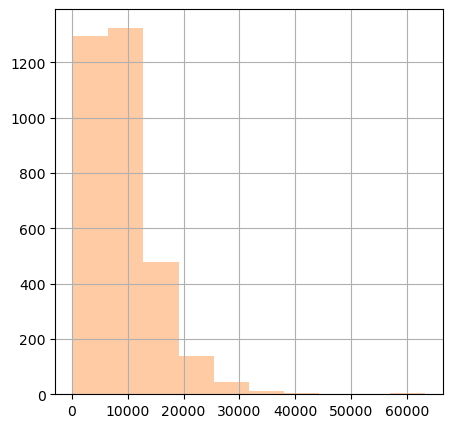

In [6]:
#타겟 데이터 히스토그램 그려보기
pre_u2_df['KWH'].hist(figsize=(5,5), color='#FFCBA4')

In [7]:
# 타겟 데이터 로그로 변환하기
import numpy as np
pre_u2_df['KWH'] = np.log1p(pre_u2_df.KWH)

<Axes: >

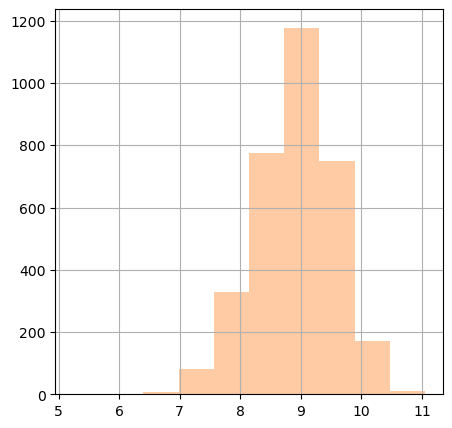

In [8]:
#타겟 데이터 로그 변환 히스토그램 그려보기
pre_u2_df['KWH'].hist(figsize=(5,5), color='#FFCBA4')

In [9]:
# 타겟 데이터 지정하고 원래 컬럼 삭제하기
pre_u2_df['target'] = pre_u2_df['KWH']
pre_u2_df = pre_u2_df.drop(labels=['KWH'], axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_u2_df.iloc[:, :-1], pre_u2_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()

# 파이프라인 구축
# 차원축소, 선형회귀 모델
pipe = Pipeline([('pca', PCA(n_components=5)), ('l_r', l_r)])

# 훈련
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=5)), ('l_r', LinearRegression())])

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [12]:
# 예측
prediction = pipe.predict(X_test)
# 평가 (오차행렬)
get_evaluation(y_test, prediction)

MSE: 0.1128, RMSE: 0.3358, MSLE: 0.0012, RMSLE: 0.0346, R2: 0.7344


### **📝3Cycle 결과**
>   
>   